<a href="https://colab.research.google.com/github/GiulioAppetito/Progetto_MOBD_2122/blob/main/prova3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/My\ Drive/ProgettoMOBD

/content/drive/My Drive/ProgettoMOBD


In [59]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn_pandas import CategoricalImputer
from sklearn.ensemble import IsolationForest, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.svm import SVC, LinearSVC
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

np.random.seed = 123

In [60]:
# LETTURA DATASET
data = pd.read_csv("train.csv", sep=",")
print(data.head())
# print("\nLabels: {}".format(np.unique(data.Y, return_counts=True)))

# print("\n# of NaNs values for each column:")
# print(data.isnull().sum(axis=0))

x = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()
# print(x.shape)
# print(y.shape)

# stratify: to mantain the same mean as y for y_tr and y_ts
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.3, random_state=258, stratify=y)

# print(x_tr.shape)
# print(y_tr.shape)
# print(x_ts.shape)
# print(y_ts.shape)

print(np.unique(y, return_counts=True)[1]/len(y))
print(np.unique(y_tr, return_counts=True)[1]/len(y_tr))
print(np.unique(y_ts, return_counts=True)[1]/len(y_ts))

   F0  F1      F2  F3  F4  F5  F6  F7         F8      F9   F10  F11  F12  \
0  39  K1   77516  R1  13  Q1  P1  M1  caucasian    Male  2174    0   40   
1  50  K2   83311  R1  13  Q2  P2  M2  caucasian    Male     0    0   13   
2  38  K3  215646  R2   9  Q3  P3  M1  caucasian    Male     0    0   40   
3  53  K3  234721  R3   7  Q2  P3  M2      black    Male     0    0   40   
4  28  K3  338409  R1  13  Q2  P4  M3      black  Female     0    0   40   

    F13  Y  
0   USA  0  
1   USA  0  
2   USA  0  
3   USA  0  
4  Cuba  0  
[0.75919044 0.24080956]
[0.75916988 0.24083012]
[0.75923841 0.24076159]


In [3]:
# valori nan
imp = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
x_tr_notnan = imp.fit_transform(x_tr)
x_ts_notnan = imp.transform(x_ts)

#gestione features categoriche
#dato che però questi sono ndarrays, per fare la one hot coded technique dobbiamo usare dataframes

x_tr_df = pd.DataFrame(x_tr_notnan)
x_ts_df = pd.DataFrame(x_ts_notnan)

x_tr_df.columns=['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']
x_ts_df.columns=['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']

# one hot code

final_df_tr = pd.concat([x_tr_df,pd.get_dummies(x_tr_df['F1'])],axis = 1)
final_df_tr.drop('F1', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(final_df_tr['F7'])],axis = 1)
final_df_tr.drop('F7', axis=1, inplace=True)

final_df = pd.concat([final_df_tr,pd.get_dummies(final_df_tr['F9'])],axis = 1)
final_df_tr.drop('F9', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(final_df_tr['F8'])],axis = 1)
final_df_tr.drop('F8', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(final_df_tr['F5'])],axis = 1)
final_df_tr.drop('F5', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(final_df_tr['F6'])],axis = 1)
final_df_tr.drop('F6', axis=1, inplace=True)

final_df_tr = pd.concat([final_df_tr,pd.get_dummies(final_df_tr['F13'])],axis = 1)
final_df_tr.drop('F13', axis=1, inplace=True)

final_df_tr.drop('F3', axis=1, inplace=True)

####################################

final_df_ts = pd.concat([x_ts_df,pd.get_dummies(x_ts_df['F1'])],axis = 1)
final_df_ts.drop('F1', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(final_df_ts['F7'])],axis = 1)
final_df_ts.drop('F7', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(final_df_ts['F9'])],axis = 1)
final_df_ts.drop('F9', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(final_df_ts['F8'])],axis = 1)
final_df_ts.drop('F8', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(final_df_ts['F5'])],axis = 1)
final_df_ts.drop('F5', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(final_df_ts['F6'])],axis = 1)
final_df_ts.drop('F6', axis=1, inplace=True)

final_df_ts = pd.concat([final_df_ts,pd.get_dummies(final_df_ts['F13'])],axis = 1)
final_df_ts.drop('F13', axis=1, inplace=True)

final_df_ts.drop('F3', axis=1, inplace=True)

print(final_df_tr.head())

print(final_df_ts.head())


NameError: ignored

In [2]:
# SCALING
print("Robust Scaler")
scaler = RobustScaler()
x_tr_scaled = scaler.fit_transform(final_df_tr)
#x_ts_scaled = scaler.transform(x_ts_notnan)

print("Media distribuzione di partenza: {}".format(np.mean(x_tr_notnan, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_tr_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_tr_notnan, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_tr_scaled, axis=0)))

print("Media distribuzione di partenza: {}".format(np.mean(x_ts_notnan, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_ts_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_ts_notnan, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_ts_scaled, axis=0)))

Robust Scaler


NameError: ignored

In [47]:
# ANOMALY DETECTION CON ISOLATION FOREST
print("Initial distribution")
print(len(x_tr))
print(np.unique(y_tr, return_counts=True)[1]/len(y_tr))

anomaly_detector = IsolationForest()
anomaly_detector.fit(x_tr_scaled)
is_inlier = anomaly_detector.predict(x_tr_scaled)

print(np.unique(is_inlier, return_counts=True))
x_tr_not_anomalous = x_tr_scaled[is_inlier==1,:]
y_tr_not_anomalous = y_tr_scaled[is_inlier==1]

print("Distribution after anomaly detection")
print(len(x_tr_not_anomalous))
print(np.unique(y_tr_not_anomalous, return_counts=True)[1]/len(y_tr_not_anomalous))

Initial distribution
22792
[0.75916988 0.24083012]
(array([-1,  1]), array([   77, 22715]))


NameError: ignored

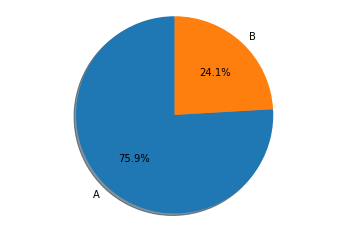

Size del dataset prima del sampler: 22792
Size del dataset dopo il sampler: 10978


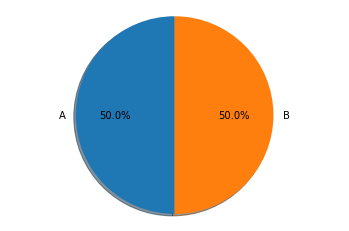

In [37]:
# BALANCING
n_classes = len(np.unique(y_tr))
fig, ax = plt.subplots()
sizes = [len(y_tr[y_tr==i]) for i in range(n_classes)]
class_names = [chr(ord('A')+i) for i in range(n_classes)]

ax.pie(sizes, labels=class_names, autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()

sampler = RandomUnderSampler(random_state=42)
x_tr_balanced, y_tr_balanced = sampler.fit_resample(x_tr_scaled, y_tr)

print("Size del dataset prima del sampler: {}".format(x_tr_scaled.shape[0]))
print("Size del dataset dopo il sampler: {}".format(x_tr_balanced.shape[0]))

fig, ax = plt.subplots()
sizes = [len(y_tr_balanced[y_tr_balanced==i]) for i in range(n_classes)]
class_names = [chr(ord('A')+i) for i in range(n_classes)]

ax.pie(sizes, labels=class_names, autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()